In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout,  GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Loading dataset

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'Dataset\Train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=9,
    image_size=(256, 256),
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'Dataset\Validation',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(256, 256),
)

Found 140002 files belonging to 2 classes.
Found 39428 files belonging to 2 classes.


In [30]:
# To test model on small scale

# subset_size = 1000
# train_ds = train_ds.take(subset_size // 8)
# validation_ds = validation_ds.take(subset_size // 8)

In [3]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Model 

In [5]:
# create CNN
# 3 convulational layer : 32, 64, 128

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(GlobalAveragePooling2D())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
early_stopping = EarlyStopping(
    monitor='val_loss',       
    patience=2,                                    
    restore_best_weights=True     
)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [9]:
# history = model.fit(train_ds , epochs=10, validation_data = validation_ds)

history = model.fit(train_ds , epochs=10, validation_data = validation_ds, callbacks=[early_stopping, checkpoint])

Epoch 1/10
15556/15556 [==============================] - 1171s 75ms/step - loss: 0.5400 - accuracy: 0.7044 - val_loss: 0.5194 - val_accuracy: 0.7463
Epoch 2/10
15556/15556 [==============================] - 1106s 71ms/step - loss: 0.2959 - accuracy: 0.8713 - val_loss: 0.3288 - val_accuracy: 0.8589
Epoch 3/10
15556/15556 [==============================] - 1140s 73ms/step - loss: 0.2451 - accuracy: 0.8973 - val_loss: 0.3855 - val_accuracy: 0.8312
Epoch 4/10
15556/15556 [==============================] - 1098s 71ms/step - loss: 0.2193 - accuracy: 0.9090 - val_loss: 0.3264 - val_accuracy: 0.8544
Epoch 5/10
15556/15556 [==============================] - 1096s 70ms/step - loss: 0.2022 - accuracy: 0.9159 - val_loss: 0.3528 - val_accuracy: 0.8706
Epoch 6/10
15556/15556 [==============================] - 1080s 69ms/step - loss: 0.1910 - accuracy: 0.9215 - val_loss: 0.2414 - val_accuracy: 0.9012
Epoch 7/10
15556/15556 [==============================] - 1046s 67ms/step - loss: 0.1817 - accuracy:

# Model evalutation 

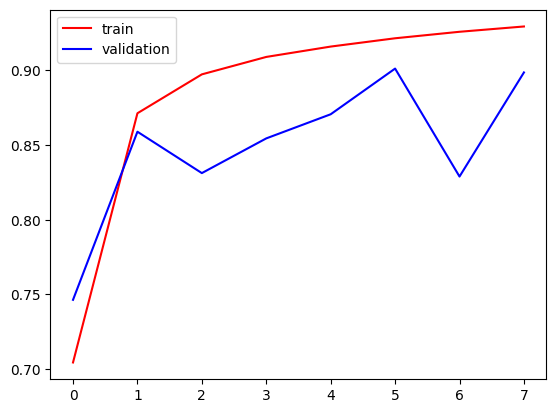

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], color = 'red', label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='validation')
plt.legend()
plt.show()

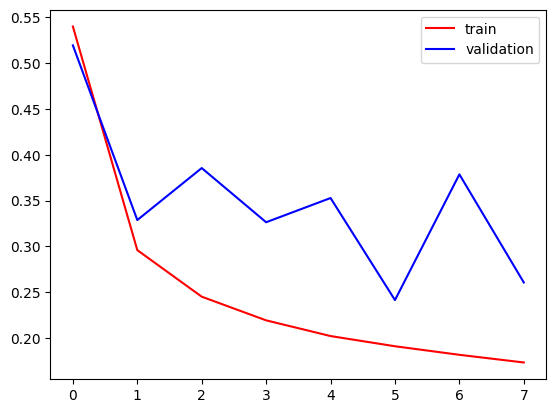

In [11]:
plt.plot(history.history['loss'], color = 'red', label='train')
plt.plot(history.history['val_loss'], color = 'blue', label='validation')
plt.legend()
plt.show()

# Testing model on Test dataset

In [12]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = r'Dataset\Test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=9,
    image_size=(256, 256),
)

loss, accuracy = model.evaluate(test_ds)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Found 10905 files belonging to 2 classes.
1212/1212 [==============================] - 27s 22ms/step - loss: 23.5264 - accuracy: 0.6906
Test Loss: 23.526409149169922
Test Accuracy: 0.6906006336212158


In [13]:
model.save("my_model.h5", include_optimizer=True)